In [ ]:
import pandas as pd
gt_2011 = pd.read_pickle("ground_truth_2011.pkl")
pred_2011 = pd.read_pickle('data/pred_2011.pkl')

In [2]:
gt_2011.set_index('village_code',inplace=True)
gt_2011.head()

,ADI,BF,FC,ASSET,LIT,MSW
village_code,,,,,,
34223,11,3,1,3,2,2
34224,14,3,3,3,3,2
34225,13,2,3,3,2,3
34228,12,1,3,3,2,3
34230,12,3,2,3,2,2


In [3]:
pred_2011.head()

,BF,FC,MSW,ASSET,LIT,ADI
27378,1,1,3,3,3,11
27379,1,3,3,3,3,13
27380,1,1,3,3,3,11
27381,1,1,3,3,3,11
27382,1,1,3,3,3,11


In [5]:
gt_2011['ADI'].describe()

count    340953.000000
mean          9.015709
std           2.328290
min           5.000000
25%           7.000000
50%           9.000000
75%          10.000000
max          15.000000
Name: ADI, dtype: float64

In [8]:
all_df = pd.merge(gt_2011,pred_2011,left_index=True, right_index=True,suffixes=('_gt','_pred'))

In [7]:
all_df.head()

,ADI_gt,BF_gt,FC_gt,ASSET_gt,LIT_gt,MSW_gt,BF_pred,FC_pred,MSW_pred,ASSET_pred,LIT_pred,ADI_pred
34223,11,3,1,3,2,2,3,3,2,3,3,14
34224,14,3,3,3,3,2,3,3,2,3,3,14
34225,13,2,3,3,2,3,3,3,2,3,2,13
34228,12,1,3,3,2,3,3,3,3,3,2,14
34230,12,3,2,3,2,2,3,2,2,3,2,12


In [8]:
all_df.shape

(340953, 12)

[Text(0.5, 0, 'Groundtruth ADI'),
 Text(0, 0.5, 'Density of villages having diff. ADI > 2')]

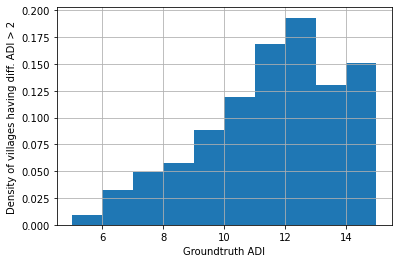

In [9]:
all_df[abs(all_df.ADI_pred - all_df.ADI_gt)>2]["ADI_gt"].hist(density = True).set(xlabel = "Groundtruth ADI", ylabel = "Density of villages having diff. ADI > 2" )

In [34]:
all_df["Difference"] = all_df.ADI_pred - all_df.ADI_gt

<AxesSubplot:>

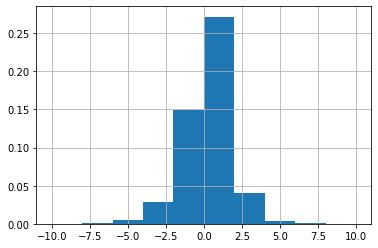

In [35]:
all_df['Difference'].hist(density = True)

In [36]:
all_df['Difference'].value_counts()

 0     124720
-1      67161
 1      60447
-2      34537
 2      21813
-3      13939
 3       5940
-4       5742
-5       2409
 4       2000
-6        869
 5        662
-7        264
 6        217
 7         95
-8         88
-9         24
 8         21
-10         3
 10         1
 9          1
Name: Difference, dtype: int64

In [37]:
gt_2011['ADI'].describe()

count    340953.000000
mean          9.015709
std           2.328290
min           5.000000
25%           7.000000
50%           9.000000
75%          10.000000
max          15.000000
Name: ADI, dtype: float64

In [14]:
import json

def make_state_dict(state_code) :
    dic = {}
    state_json = json.load(open('state_json/'+state_code+'.geojson','r'))
    for village in state_json['features']:
        try :
            dic[village["properties"]['pc11_village_id']] = 1
        except :
            dic[int(village["properties"]['pc11_villa'])] = 1
    return dic

In [23]:
#'PB','CG', 'UP', 'MH', 'AP', 'BR', 'JH', 'GJ', 'TN', 'KA', 'RJ', 'HR', 'MP', 'OR'
PB_ = make_state_dict("PB")
CG_ = make_state_dict("CG")
MH_ = make_state_dict("MH")
AP_ = make_state_dict("AP")
BR_ = make_state_dict("BR")
JH_ = make_state_dict("JH")
GJ_ = make_state_dict("GJ")
TN_ = make_state_dict("TN")
KA_ = make_state_dict("KA")
RJ_ = make_state_dict("RJ")
HR_ = make_state_dict("HR")
MP_ = make_state_dict("MP")
OR_ = make_state_dict("OR")


In [24]:
UP_ = make_state_dict("UP")

In [20]:
df_UP = all_df[all_df.index.isin(UP_)]

In [21]:
df_PB = all_df[all_df.index.isin(PB_)]
df_CG = all_df[all_df.index.isin(CG_)]
df_MH = all_df[all_df.index.isin(MH_)]
df_AP = all_df[all_df.index.isin(AP_)]
df_BR = all_df[all_df.index.isin(BR_)]
df_JH = all_df[all_df.index.isin(JH_)]
df_GJ = all_df[all_df.index.isin(GJ_)]
df_TN = all_df[all_df.index.isin(TN_)]
df_KA = all_df[all_df.index.isin(KA_)]
df_RJ = all_df[all_df.index.isin(RJ_)]
df_HR = all_df[all_df.index.isin(HR_)]
df_MP = all_df[all_df.index.isin(MP_)]
df_OR = all_df[all_df.index.isin(OR_)]


In [22]:
dic_states = {}
dic_states["PB"] = df_PB
dic_states["CG"] = df_CG
dic_states["MH"] = df_MH
dic_states["AP"] = df_AP
dic_states["BR"] = df_BR
dic_states["JH"] = df_JH
dic_states["GJ"] = df_GJ
dic_states["TN"] = df_TN
dic_states["KA"] = df_KA
dic_states["RJ"] = df_RJ
dic_states["HR"] = df_HR
dic_states["MP"] = df_MP
dic_states["OR"] = df_OR


In [27]:
dic_states["UP"] = df_UP

In [28]:
states_list = ['PB','CG', 'UP', 'MH', 'AP', 'BR', 'JH', 'GJ', 'TN', 'KA', 'RJ', 'HR', 'MP', 'OR']
for state in states_list:
    print(state, (((dic_states[state].ADI_pred - dic_states[state].ADI_gt) ** 2).mean() ** .5)/dic_states[state].ADI_gt.mean(), (abs(dic_states[state].ADI_pred - dic_states[state].ADI_gt)).mean(),  (abs(dic_states[state].ADI_pred - dic_states[state].ADI_gt)).std())

PB 0.749602080486532 5.732027443571642 2.281345215979709
CG nan nan nan
UP 0.2930429848877357 1.8958698658454871 1.4093634740197205
MH nan nan nan
AP nan nan nan
BR 0.2949805507587731 1.8581703107019563 1.462943252447241
JH nan nan nan
GJ nan nan nan
TN nan nan nan
KA nan nan nan
RJ 0.2996128461680326 2.24478823406986 1.7483914928504183
HR 0.49964311612962947 4.330495356037152 2.1747497039428256
MP nan nan nan
OR nan nan nan


In [29]:
df_UP.head()

,village_code,ADI_gt,BF_gt,FC_gt,ASSET_gt,LIT_gt,MSW_gt,BF_pred,FC_pred,MSW_pred,ASSET_pred,LIT_pred,ADI_pred
108884,123428,11,1,2,3,3,2,1,1,2,2,2,8
108886,123430,11,1,2,3,3,2,1,1,3,2,2,9
108887,123431,10,1,3,2,2,2,1,1,3,2,2,9
108888,123432,10,1,1,3,3,2,1,1,2,2,2,8
108889,123434,8,1,1,2,2,2,1,1,2,2,2,8


In [30]:
abs(all_df.ADI_gt- all_df.ADI_pred).mean()

2.319608464490687

In [31]:
abs(all_df.ADI_gt- all_df.ADI_pred).std()

1.914370398054535

In [32]:
def count_vill(state_code) :
    state_json = json.load(open('state_json/'+state_code+'.geojson','r'))
    print(state + " " +str(len(state_json['features'])) + " " + str(dic_states[state_code].shape[0]) + " " +str((dic_states[state_code].shape[0]/len(state_json['features']))*100) )

In [33]:
states_list = ['AP', 'BR', 'CG', 'GJ', 'HR', 'JH', 'KA', 'MH', 'MP',  'OR', 'PB',  'RJ', 'TN', 'UP']
for state in states_list:
    count_vill(state)

AP 23478 0 0.0
BR 44982 27808 61.82028366902317
CG 18726 0 0.0
GJ 16281 0 0.0
HR 6729 5168 76.80190221429632
JH 32454 0 0.0
KA 28693 0 0.0
MH 42419 0 0.0
MP 54874 0 0.0
OR 45902 0 0.0
PB 12561 10057 80.065281426638
RJ 36301 28829 79.41654499876036
TN 16040 0 0.0
UP 108718 70143 64.51829503854007


In [ ]:
adi_2001 = pd.read_pickle('data/pred_2001.pkl')
adi_2011 = pd.read_pickle('data/pred_2011.pkl')
adi_2019 = pd.read_pickle('data/pred_2019.pkl')

In [ ]:
data_01_11 = pd.merge(adi_2001,adi_2011,left_index=True,right_index=True,suffixes=("_2001","_2011"))

In [ ]:
data_01_11 = data_01_11[data_01_11["ADI_2011"]<12]

In [ ]:
data_01_11["ADI_Diff"] = data_01_11["ADI_2011"] - data_01_11["ADI_2001"]

In [24]:
data_01_11.head()

,BF_2001,FC_2001,MSW_2001,ASSET_2001,LIT_2001,ADI_2001,BF_2011,FC_2011,MSW_2011,ASSET_2011,LIT_2011,ADI_2011,ADI_Diff,index
27378,1,1,1,2,2,7,1,1,3,3,3,11,4,27378
27380,1,1,1,2,2,7,1,1,3,3,3,11,4,27380
27381,1,1,1,2,2,7,1,1,3,3,3,11,4,27381
27382,1,1,1,2,2,7,1,1,3,3,3,11,4,27382
27384,1,1,1,2,2,7,1,1,3,3,3,11,4,27384


In [14]:
import json
def count_vill(state_code) :
    state_json = json.load(open('state_json/'+state_code+'.geojson','r'))
    vil_dict = {}
    for village in state_json['features']:
        try:
            vil_dict[village["properties"]['pc11_village_id']] = 1
        except:
            vil_dict[int(village["properties"]['pc11_villa'])] = 1
    return vil_dict


In [ ]:
count_vill("UP")

In [21]:
p = count_vill("AP")

In [23]:
data_01_11["index"] = data_01_11.index

In [25]:
data_01_11["index"] in p

TypeError: unhashable type: 'Series'

In [26]:
states_list = ['AP', 'BR', 'CG', 'GJ', 'HR', 'JH', 'KA', 'MH', 'MP',  'OR', 'PB',  'RJ', 'TN', 'UP']
for state in states_list:
    p = count_vill(state)
    temp = data_01_11
    temp = temp[temp["index"].map(lambda x : x in p)]
    print(state, temp["ADI_Diff"].mean(),temp["ADI_Diff"].std())

AP -0.14998930176164324 1.5868479711303174
BR -0.13007085428980505 1.1721014582566793
CG -0.6042199021683581 1.634798729931966
GJ 0.8680938479835658 1.5886122406217305
HR -1.9718004338394794 2.3868450185748262
JH 0.15402387370042356 1.1217045437952682
KA 0.8443322514725328 1.3594888517987396
MH 0.800052381486886 1.7021263617203661
MP -0.24123742761353245 1.4378756193297266
OR 0.33334761741515256 1.3694122315957433
PB 0.2857142857142857 2.48469601474995
RJ -0.040465134428532404 1.4608103823613148
TN 0.9153420870767104 1.6612809548981862
UP 0.08663509123478155 1.3962512704251506


In [27]:
data_11_19 = pd.merge(adi_2011,adi_2019,left_index=True,right_index=True,suffixes=("_2011","_2019"))

In [ ]:
data_11_19 = data_11_19[data_11_19["ADI_2011"]<12]